In [49]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision.utils import save_image

In [50]:
device = 'cuda'

In [51]:
batch_size = 256

train = torchvision.datasets.MNIST(root='../../dataset/', train=True)
test = torchvision.datasets.MNIST(root='../../dataset/', train=False)

trainLoader = DataLoader(train, batch_size, shuffle=True)
testLoader = DataLoader(test, batch_size, shuffle=False)

In [52]:
class Generator(nn.Module):
	def __init__(self, d_noise, d_hidden):
		super(Generator, self).__init__()
		
		self.G = nn.Sequential(
			nn.Linear(d_noise, d_hidden),
			nn.ReLU(),
			nn.Dropout(0.2),
			nn.Linear(d_hidden, d_hidden),
			nn.ReLU(),
			nn.Dropout(0.2),
			nn.Linear(d_hidden, 28*28),
			nn.Sigmoid()
		)
	
	def forward(self, x):
		x = self.G(x)
		return x
	

class Discriminator(nn.Module):
	def __init__(self, d_noise, d_hidden):
		super(Discriminator, self).__init__()

		self.D = nn.Sequential(
			nn.Linear(28*28, d_hidden),
			nn.ReLU(),
			nn.Dropout(0.2),
			nn.Linear(d_hidden, d_hidden),
			nn.ReLU(),
			nn.Dropout(0.2),
			nn.Linear(d_hidden, 1),
			nn.Sigmoid()
		)
	
	def forward(self, x):
		x = self.D(x)
		return x

In [53]:
G = Generator(d_noise=100, d_hidden=256).to(device)
D = Discriminator(d_noise=100, d_hidden=256).to(device)

In [54]:
z = torch.randn(batch_size, 100).to('cuda')
img_fake = G(z).reshape(-1, 28, 28)

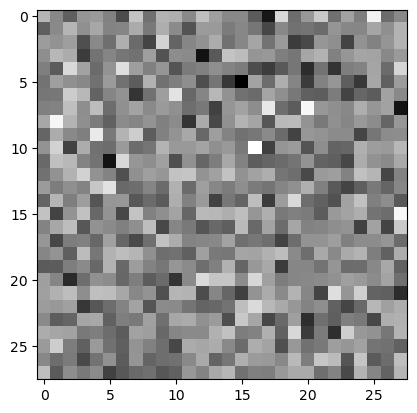

In [59]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img.detach()
    np_img = img.numpy()
    plt.imshow(np_img, cmap='gray')
    plt.show()

imshow(img_fake[0].cpu())